# Importando Dados

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [1]:
# manipuação de dados
import pandas as pd
import numpy as np
import janitor

# dataviz
import matplotlib.pyplot as plt
import seaborn as sns

# modelos
import statsmodels.api as sm
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV



# config
%matplotlib inline
pd.options.display.max_columns = None

In [2]:
# Importando dataset
loja10 = pd.read_csv('Dados/loja_10_full_features.csv')
feriados = pd.read_csv('Dados/feriados_peso.csv')

In [3]:
dados = loja10.merge(feriados.drop_duplicates(subset=['data']), on='data', how='left')

In [9]:
dados.sample(10)

,data,loja,receita,desconto,receita_liquida,cliente,gorjeta,maxtempC,mintempC,cloudcover,humidity,precipMM,pressure,windspeedKmph,semana,dia,mes,ano,diadoano,feriado,tipo_feriado,pax,eventos,feriado_Aniversário São Paulo,feriado_Ano Novo,feriado_Carnaval,feriado_Consciência Negra,feriado_Constitucionalista,feriado_Corpus Christ,feriado_Dia Internacional da Mulher,feriado_Dia da Secretária,feriado_Dia das Mães,feriado_Dia do Trabalho,feriado_Dia dos Namorados,feriado_Dia dos Pais,feriado_Finados,feriado_Independência,feriado_Natal,feriado_Nsa. Sra. Aparecida,feriado_Paixão de Cristo,feriado_Proclamação da República,feriado_Páscoa,feriado_Tiradentes,feriado_Véspera Ano Novo
693,2016-11-24,950,14257.30,257.58,13999.72,187,1444.40,25,16,81,89,0.7,1015,9,3,24,11,2016,329,0,0,990.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1442,2018-12-13,1650,21836.91,1050.03,20786.88,330,1783.72,30,22,21,54,0.0,1015,7,3,13,12,2018,347,0,0,600.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
543,2016-06-27,980,13751.40,213.50,13537.90,182,1418.39,20,11,44,87,0.0,1027,7,0,27,6,2016,179,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44,2015-02-14,1220,15907.10,319.18,15587.92,234,0.00,28,20,47,86,13.3,1014,6,5,14,2,2015,45,0,0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
800,2017-03-11,780,12912.01,288.42,12623.59,154,1009.41,27,20,44,89,1.3,1014,8,5,11,3,2017,70,0,0,7873.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,2015-02-12,1340,13493.50,757.47,12736.03,207,0.00,29,20,22,81,2.6,1014,9,3,12,2,2015,43,0,0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
811,2017-03-22,1140,16686.20,470.06,16216.14,215,1558.88,24,16,60,88,0.0,1020,11,2,22,3,2017,81,0,0,236.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
883,2017-06-02,1240,16181.00,233.28,15947.72,215,1318.44,20,10,16,81,0.0,1020,11,4,2,6,2017,153,0,0,951.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1474,2019-01-14,1410,16089.90,574.41,15515.49,281,1094.96,32,25,35,57,0.9,1015,7,0,14,1,2019,14,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87,2015-03-29,1540,20559.00,391.52,20167.48,272,0.00,26,17,75,91,4.7,1015,7,6,29,3,2015,88,0,0,2756.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0


In [7]:
dados.to_csv('Loja_10_Unificado.csv', index=False)

# EDA

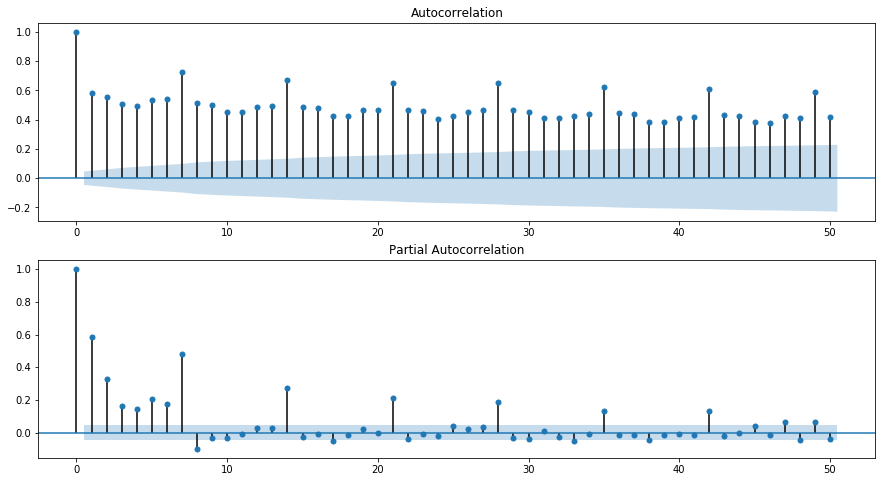

In [11]:
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(dados['cliente'], lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(dados['cliente'], lags=50, ax=ax[1])
plt.show()

# Data prep

In [385]:
# dados = pd.get_dummies(dados, columns=['feriado', 'tipo_feriado'])

In [386]:
# def peso_feriado(df, feriado):
#     for x in df.itertuples():
#         try:
#             for i in range(1,6):
#                 if df[feriado][x.Index+i] == 1:
#                     df[feriado][x.Index] = i+1
#                 if df[feriado][x.Index-i] == 1:
#                     df[feriado][x.Index] = i+1
#             print(f'Coluna{feriado} ajustada')
#         except: 
#             pass

In [387]:
# for i in dados.columns[22:43]:
#     peso_feriado(dados, i)

In [12]:
dados = loja10.merge(feriados.drop_duplicates(subset=['data']), on='data', how='left')

In [13]:
dados['data'] = pd.to_datetime(dados['data'])

# Feature engineering

In [14]:
dados['data'] = pd.to_datetime(dados['data'])

In [15]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
#     df['date'] = df.index
    df['hour'] = df['data'].dt.hour
    df['dayofweek'] = df['data'].dt.dayofweek
    df['quarter'] = df['data'].dt.quarter
    df['month'] = df['data'].dt.month
    df['year'] = df['data'].dt.year
    df['dayofyear'] = df['data'].dt.dayofyear
    df['dayofmonth'] = df['data'].dt.day
    df['weekofyear'] = df['data'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [16]:
dados.set_index('data', inplace=True)

In [17]:
lags = 8
for i in range(1,lags):
    dados['lag_'+str(i)] = dados['cliente'].shift(i)

In [18]:
dados = dados.drop(columns=['loja', 'receita', 'receita_liquida', 'gorjeta', 'desconto', 'feriado', 'tipo_feriado'])

In [19]:
dados = dados.dropna()

In [20]:
dados.head()

,cliente,maxtempC,mintempC,cloudcover,humidity,precipMM,pressure,windspeedKmph,semana,dia,mes,ano,diadoano,pax,eventos,feriado_Aniversário São Paulo,feriado_Ano Novo,feriado_Carnaval,feriado_Consciência Negra,feriado_Constitucionalista,feriado_Corpus Christ,feriado_Dia Internacional da Mulher,feriado_Dia da Secretária,feriado_Dia das Mães,feriado_Dia do Trabalho,feriado_Dia dos Namorados,feriado_Dia dos Pais,feriado_Finados,feriado_Independência,feriado_Natal,feriado_Nsa. Sra. Aparecida,feriado_Paixão de Cristo,feriado_Proclamação da República,feriado_Páscoa,feriado_Tiradentes,feriado_Véspera Ano Novo,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-08,256,30,19,15,79,5.9,1014,5,3,8,1,2015,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,228.0,198.0,181.0,275.0,169.0,172.0,282.0
2015-01-09,236,31,20,15,76,3.1,1013,6,4,9,1,2015,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,256.0,228.0,198.0,181.0,275.0,169.0,172.0
2015-01-10,227,30,20,16,78,5.3,1014,8,5,10,1,2015,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,236.0,256.0,228.0,198.0,181.0,275.0,169.0
2015-01-11,296,32,20,15,77,3.2,1014,4,6,11,1,2015,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,227.0,236.0,256.0,228.0,198.0,181.0,275.0
2015-01-12,171,32,21,15,78,14.9,1013,5,0,12,1,2015,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,296.0,227.0,236.0,256.0,228.0,198.0,181.0


In [24]:
dados = dados.clean_names()

In [22]:
dados.head()

,cliente,maxtempc,mintempc,cloudcover,humidity,precipmm,pressure,windspeedkmph,semana,dia,mes,ano,diadoano,pax,eventos,feriado_aniversario_sao_paulo,feriado_ano_novo,feriado_carnaval,feriado_consciencia_negra,feriado_constitucionalista,feriado_corpus_christ,feriado_dia_internacional_da_mulher,feriado_dia_da_secretaria,feriado_dia_das_maes,feriado_dia_do_trabalho,feriado_dia_dos_namorados,feriado_dia_dos_pais,feriado_finados,feriado_independencia,feriado_natal,feriado_nsa_sra_aparecida,feriado_paixao_de_cristo,feriado_proclamacao_da_republica,feriado_pascoa,feriado_tiradentes,feriado_vespera_ano_novo,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-08,256,30,19,15,79,5.9,1014,5,3,8,1,2015,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,228.0,198.0,181.0,275.0,169.0,172.0,282.0
2015-01-09,236,31,20,15,76,3.1,1013,6,4,9,1,2015,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,256.0,228.0,198.0,181.0,275.0,169.0,172.0
2015-01-10,227,30,20,16,78,5.3,1014,8,5,10,1,2015,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,236.0,256.0,228.0,198.0,181.0,275.0,169.0
2015-01-11,296,32,20,15,77,3.2,1014,4,6,11,1,2015,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,227.0,236.0,256.0,228.0,198.0,181.0,275.0
2015-01-12,171,32,21,15,78,14.9,1013,5,0,12,1,2015,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,296.0,227.0,236.0,256.0,228.0,198.0,181.0


# Modelagem

## Train-test split

In [19]:
split_date = '2019-01-01'
loja_train = dados.loc[dados.index <= split_date].copy()
loja_test = dados.loc[dados.index > split_date].copy()

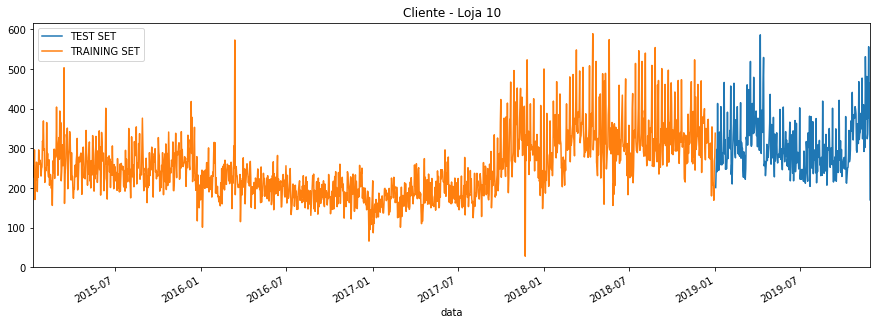

In [20]:
_ = loja_test[['cliente']] \
    .rename(columns={'cliente': 'TEST SET'}) \
    .join(loja_train[['cliente']].rename(columns={'cliente': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(15,5), title='Cliente - Loja 10')

In [21]:
X_train = loja_train.drop(columns=['cliente'])
y_train = loja_train['cliente']
X_test = loja_test.drop(columns=['cliente'])
y_test = loja_test['cliente']

In [22]:
reg = xgb.XGBRegressor(booster='gbtree', n_estimators=200, subsample= 0.6,
                       min_child_weight= 1,
                       max_depth= 3,
                       gamma= 5,
                       eta= 0.9500000000000001,
                       colsample_bytree= 0.8,
                       objective= 'reg:squarederror'
                      )

In [23]:
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

C:\Users\tomas\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\tomas\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.9500000000000001,
             gamma=5, importance_type='gain', learning_rate=0.1,
             max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
             n_estimators=200, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.6, verbosity=1)

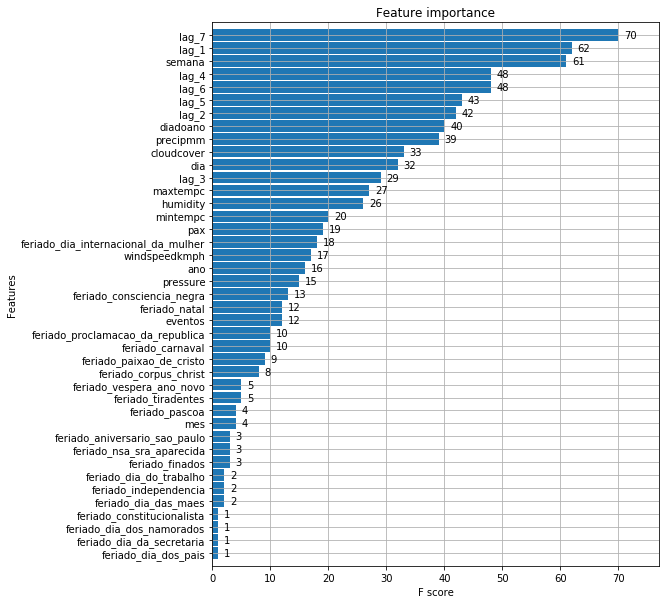

In [24]:
plt.rcParams["figure.figsize"] = (8, 10)
_ = plot_importance(reg, height=0.9)

In [25]:
loja_test['cliente_Prediction'] = reg.predict(X_test)
loja_all = pd.concat([loja_test, loja_train], sort=False)

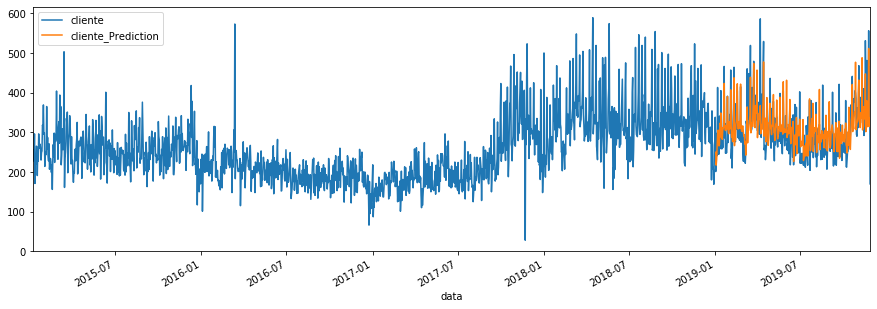

In [26]:
_ = loja_all[['cliente','cliente_Prediction']].plot(figsize=(15, 5))

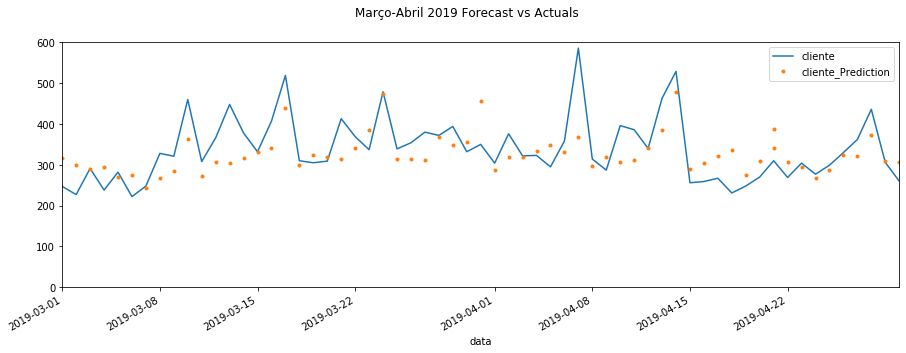

In [27]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = loja_all[['cliente', 'cliente_Prediction']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower='2019-03-01', upper='2019-04-30')
ax.set_ylim(0, 600)
plot = plt.suptitle('Março-Abril 2019 Forecast vs Actuals')

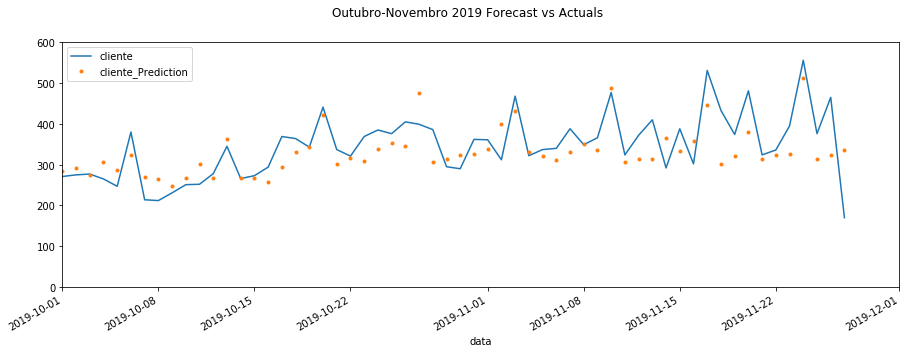

In [28]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = loja_all[['cliente', 'cliente_Prediction']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower='2019-10-01', upper='2019-12-01')
ax.set_ylim(0, 600)
plot = plt.suptitle('Outubro-Novembro 2019 Forecast vs Actuals')

In [29]:
loja_test['erro'] = loja_test['cliente'] - loja_test['cliente_Prediction']

In [30]:
loja_test['erro'].sort_values().head(10)

data
2019-11-27   -166.506348
2019-06-02   -110.294952
2019-03-31   -106.845001
2019-04-18   -104.411865
2019-08-27    -94.814697
2019-07-07    -93.958221
2019-08-11    -87.956879
2019-11-02    -87.955841
2019-07-26    -84.675293
2019-02-06    -84.255463
Name: erro, dtype: float64

In [31]:
loja_test['erro'].sort_values().tail(10)

data
2019-11-13     96.207092
2019-03-21     98.066345
2019-11-20    101.742615
2019-07-24    113.026917
2019-08-18    117.218414
2019-01-06    117.252106
2019-11-18    131.379456
2019-11-26    140.620605
2019-03-13    143.413574
2019-04-07    218.660706
Name: erro, dtype: float64

In [32]:
loja_test.loc['2019-04-07']

cliente                                 586.000000
maxtempc                                 31.000000
mintempc                                 24.000000
cloudcover                               57.000000
humidity                                 68.000000
precipmm                                 19.500000
pressure                               1014.000000
windspeedkmph                            10.000000
semana                                    6.000000
dia                                       7.000000
mes                                       4.000000
ano                                    2019.000000
diadoano                                 97.000000
pax                                     327.000000
eventos                                   2.000000
feriado_aniversario_sao_paulo             0.000000
feriado_ano_novo                          0.000000
feriado_carnaval                          0.000000
feriado_consciencia_negra                 0.000000
feriado_constitucionalista     